<a href="https://colab.research.google.com/github/Freaker99/domain-classifier/blob/main/Domain_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


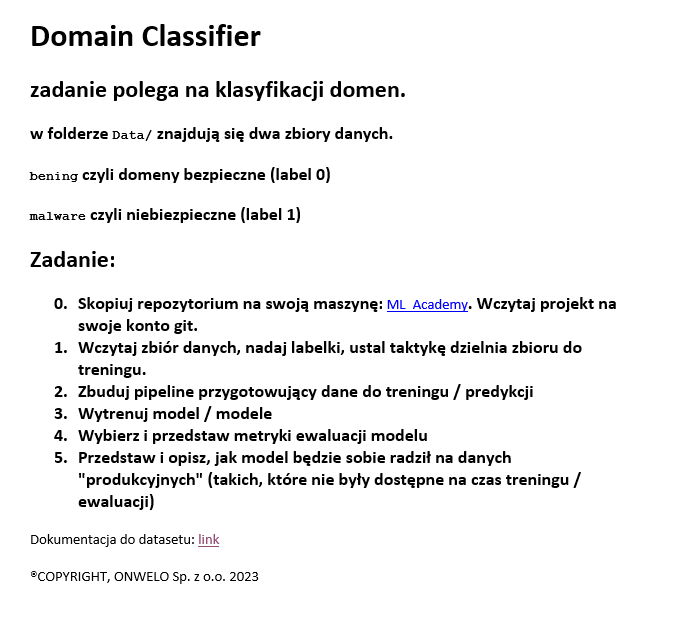


Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

##Data Collection and Processing

In [ ]:
# loading csv data to a Pandas DataFrame
bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')
malware_data = pd.read_csv('/content/drive/My Drive/CSV_malware.csv')

<ipython-input-82-b21ad4e4e40b>:2: DtypeWarning: Columns (9,10,12,13,17,18,20,21,24,25,27,28,36) have mixed types. Specify dtype option on import or set low_memory=False.
  bening_data = pd.read_csv('/content/drive/My Drive/CSV_benign.csv')


In [ ]:
# print first 5 rows in the dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0


In [ ]:
# print last 5 rows in the dataframe
bening_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank
494130,NaN,NaN,298,NaN,b'rossdawson.com.',New South Wales,NaN,AU,2006-02-05 02:21:21,0,0,ROSSDAWSON.COM,876461.0,0.0,Advanced Human Technologies,11,dawson,0,-1.0,"['r', 'o', 's', 's', 'd', 'a', 'w', 's', 'o', 'n']",0,2.530857,5199 days 21:58:00.670791,com,0,0,abuse@godaddy.com,0.0,0.0,"[('apple.com', 86), ('adobe.com', 86)]",0,"['ros', 'oss', 'ssd', 'sda', 'daw', 'aws', 'wso', 'son']","defaultdict(<class 'int'>, {'o': 2, 'r': 1, 'n': 1, 'a': 1, 's': 3, 'w': 1, 'd': 1})","['ro', 'os', 'ss', 'sd', 'da', 'aw', 'ws', 'so', 'on']",GoDaddy.com LLC,rossdawson,2.0,-1.0
494131,DE,8560.0,3599,217.160.0.178,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,0,weddingprime.de,-1.0,0.0,NaN,13,wedding,0,-1.0,"['w', 'e', 'd', 'd', 'i', 'n', 'g', 'p', 'r', 'i', 'm', 'e']",0,2.954252,0,de,0,0,NaN,0.0,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gpr', 'pri', 'rim', 'ime']","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g': 1, 'n': 1, 'm': 1, 'r': 1, 'p': 1, 'w': 1, 'd': 2})","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr', 'ri', 'im', 'me']",NaN,weddingprime,0.0,-1.0
494132,NaN,NaN,3599,NaN,b'weddingprime.de.',NaN,NaN,NaN,NaN,0,0,weddingprime.de,-1.0,0.0,NaN,13,wedding,0,-1.0,"['w', 'e', 'd', 'd', 'i', 'n', 'g', 'p', 'r', 'i', 'm', 'e']",0,2.954252,0,de,0,0,NaN,0.0,0.0,"[('google.de', 86), ('amazon.de', 86)]",0,"['wed', 'edd', 'ddi', 'din', 'ing', 'ngp', 'gpr', 'pri', 'rim', 'ime']","defaultdict(<class 'int'>, {'e': 2, 'i': 2, 'g': 1, 'n': 1, 'm': 1, 'r': 1, 'p': 1, 'w': 1, 'd': 2})","['we', 'ed', 'dd', 'di', 'in', 'ng', 'gp', 'pr', 'ri', 'im', 'me']",NaN,weddingprime,0.0,-1.0
494133,UA,24703.0,21599,195.128.17.206,b'vlasenko.net.',--,NaN,UA,2000-10-16 13:58:43,0,0,"['VLASENKO.NET', 'vlasenko.net']",372895.0,0.0,NaN,9,ko,0,-1.0,"['v', 'l', 'a', 's', 'e', 'n', 'k', 'o']",0,2.817711,7137 days 10:20:41.804934,net,0,0,abuse@joker.com,0.0,0.0,"[('php.net', 86), ('a8.net', 86)]",0,"['vla', 'las', 'ase', 'sen', 'enk', 'nko']","defaultdict(<class 'int'>, {'e': 1, 'k': 1, 'n': 1, 'l': 1, 'v': 1, 'a': 1, 's': 1, 'o': 1})","['vl', 'la', 'as', 'se', 'en', 'nk', 'ko']",CSL Computer Service Langenbach GmbH d/b/a joker.com,vlasenko,6.0,-1.0
494134,AU,24446.0,14399,202.47.4.14,b'drterrencescamp.com.au.',NaN,NaN,NaN,NaN,0,0,NaN,2693696.0,0.0,NaN,16,terrence,0,-1.0,"['d', 'r', 't', 'e', 'r', 'r', 'e', 'n', 'c', 'e', 's', 'c', 'a', 'm', 'p']",0,3.030639,0,com.au,0,0,NaN,0.0,0.0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['drt', 'rte', 'ter', 'err', 'rre', 'ren', 'enc', 'nce', 'ces', 'esc', 'sca', 'cam', 'amp']","defaultdict(<class 'int'>, {'t': 1, 'e': 3, 'p': 1, 'n': 1, 'm': 1, 'r': 3, 'a': 1, 's': 1, 'c': 2, 'd': 1})","['dr', 'rt', 'te', 'er', 'rr', 're', 'en', 'nc', 'ce', 'es', 'sc', 'ca', 'am', 'mp']",NaN,drterrencescamp,0.0,-1.0


In [ ]:
# print first 5 rows in the dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,NaN,0,4277 days 21:07:56.450015,2.963120,6.0,"['abuse@name.com', 'roxics@gmail.com']",2008-08-04 04:20:05,Scape Films,"defaultdict(<class 'int'>, {'d': 1, 'n': 1, 'a': 1, 'i': 2, 'r': 1, 'h': 1, 'c': 1, 'o': 1, 'p': 1})","['di', 'ic', 'cr', 'ro', 'op', 'ph', 'ha', 'an', 'ni']",MI,0,US,-1.0,0,0,"['d', 'i', 'c', 'r', 'o', 'p', 'h', 'a', 'n', 'i']",11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'han', 'ani']",0.000000,0
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,dionneg,NaN,0,4596 days 7:06:33.492321,2.375000,2.0,"['support@bluehost.com', 'GORDONDN@HOTMAIL.COM', 'DOMAIN@REDL.CA']",2007-09-20 18:21:29,NaN,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'g': 1, 'i': 1, 'e': 1, 'o': 1})","['di', 'io', 'on', 'nn', 'ne', 'eg']",CALIFORNIA,0,US,-1.0,0,0,"['d', 'i', 'o', 'n', 'n', 'e', 'g']",8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,vipprojects,NaN,0,2457 days 14:55:14.742716,3.119549,2.0,work@marksmile.com,2013-07-29 10:32:49,NaN,"defaultdict(<class 'int'>, {'v': 1, 'c': 1, 'j': 1, 'i': 1, 'r': 1, 't': 1, 's': 1, 'e': 1, 'o': 1, 'p': 2})","['vi', 'ip', 'pp', 'pr', 'ro', 'oj', 'je', 'ec', 'ct', 'ts']",NaN,0,NaN,-1.0,0,0,"['v', 'i', 'p', 'p', 'r', 'o', 'j', 'e', 'c', 't', 's']",12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'jec', 'ect', 'cts']",0.000000,0
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:04.890200,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:06.211003,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0


In [ ]:
# print last 5 rows of the dataframe
malware_data.tail()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded
4994,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',0,mechanical,NaN,0,0,naveenmechanical,NaN,0,NaN,2.890279,NaN,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e': 3, 'i': 1, 'm': 1, 'h': 1, 'a': 3, 'c': 2, 'l': 1})","['na', 'av', 've', 'ee', 'en', 'nm', 'me', 'ec', 'ch', 'ha', 'an', 'ni', 'ic', 'ca', 'al']",NaN,0,NaN,NaN,0,0,"['n', 'a', 'v', 'e', 'e', 'n', 'm', 'e', 'c', 'h', 'a', 'n', 'i', 'c', 'a', 'l']",17,"[('facebook.com', 86), ('twitter.com', 86)]",com,-1.0,NaN,0,NaN,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'mec', 'ech', 'cha', 'han', 'ani', 'nic', 'ica', 'cal']",0.000000,0
4995,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,000webhostapp,NaN,0,1440 days 14:10:23.343224,3.808768,4.0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",2016-05-11 13:34:12,GDPR Masked,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Larnaka,0,CY,-1.0,0,0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']",7.894737,0
4996,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',0,p,000WEBHOSTAPP.COM,0,1,000webhostapp,NaN,0,1440 days 14:10:24.246772,3.808768,4.0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",2016-05-11 13:34:12,GDPR Masked,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Larnaka,0,CY,-1.0,0,0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",32,"[('twitter.com', 86), ('google.com', 86)]",com,-1.0,Hostinger UAB,0,3851.0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']",7.894737,0
4997,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',0,stefanie,stefanie-bolemant.de,0,0,stefanie-bolemant,NaN,0,0,3.340769,0.0,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm': 1, 'a': 2, 'l': 1, 't': 2, 'i': 1, 'b': 1, 's': 1, 'e': 3, 'o': 1, 'f': 1})","['st', 'te', 'ef', 'fa', 'an', 'ni', 'ie', 'e-', '-b', 'bo', 'ol', 'le', 'em', 'ma', 'an', 'nt']",NaN,0,NaN,-1.0,0,0,"['s', 't', 'e', 'f', 'a', 'n', 'i', 'e', '-', 'b', 'o', 'l', 'e', 'm', 'a', 'n', 't']",18,"[('google.de', 86), ('e-recht24.de', 86)]",de,-1.0,NaN,0,-1.0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie-', 'e-b', '-bo', 'bol', 'ole', 'lem', 'ema', 'man', 'ant']",0.000000,0
4998,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',0,mnet,asamnet.de,0,1,asamnet,NaN,0,0,2.781301,0.0,NaN,NaN,NaN,"defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a': 2, 'm': 1, 's': 1, 'b': 1, 'w': 1, 'e': 2})","['as', 'sa', 'am', 'mn', 'ne', 'et']",NaN,0,NaN,-1.0,0,0,"['a', 's', 'a', 'm', 'n', 'e', 't']",11,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",de,-1.0,NaN,0,5004230.0,"['asa', 'sam', 'amn', 'mne', 'net']",0.000000,0


In [ ]:
# number of rows and columns
bening_data.shape

(494135, 38)

In [ ]:
# number of rows and columns
malware_data.shape

(4999, 38)

In [ ]:
# add labels
bening_data['Label'] = 0
malware_data['Label'] = 1

In [ ]:
# display all columns
pd.set_option('display.max_columns', None)

In [ ]:
# print first 5 rows in the labeled dataframe
bening_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [ ]:
# print first 5 rows in the labeled dataframe
malware_data.head()

,Country,ASN,TTL,IP,Domain,oc_8,longest_word,Domain_Name,dec_32,subdomain,sld,Registrant_Name,hex_32,Domain_Age,entropy,Name_Server_Count,Emails,Creation_Date_Time,Organization,char_distribution,2gram,State,oc_32,Country.1,Page_Rank,hex_8,dec_8,1gram,len,typos,tld,shortened,Registrar,obfuscate_at_sign,Alexa_Rank,3gram,numeric_percentage,puny_coded,Label
0,US,26347.0,14399,67.205.14.183,b'dicrophani.com.',0,hani,DICROPHANI.COM,0,0,dicrophani,NaN,0,4277 days 21:07:56.450015,2.963120,6.0,"['abuse@name.com', 'roxics@gmail.com']",2008-08-04 04:20:05,Scape Films,"defaultdict(<class 'int'>, {'d': 1, 'n': 1, 'a': 1, 'i': 2, 'r': 1, 'h': 1, 'c': 1, 'o': 1, 'p': 1})","['di', 'ic', 'cr', 'ro', 'op', 'ph', 'ha', 'an', 'ni']",MI,0,US,-1.0,0,0,"['d', 'i', 'c', 'r', 'o', 'p', 'h', 'a', 'n', 'i']",11,"[('apple.com', 86), ('adobe.com', 86)]",com,-1.0,Name.com inc.,0,-1.0,"['dic', 'icr', 'cro', 'rop', 'oph', 'pha', 'han', 'ani']",0.000000,0,1
1,US,46606.0,14399,70.40.220.126,b'dionneg.com.',0,dio,DIONNEG.COM,0,0,dionneg,NaN,0,4596 days 7:06:33.492321,2.375000,2.0,"['support@bluehost.com', 'GORDONDN@HOTMAIL.COM', 'DOMAIN@REDL.CA']",2007-09-20 18:21:29,NaN,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'g': 1, 'i': 1, 'e': 1, 'o': 1})","['di', 'io', 'on', 'nn', 'ne', 'eg']",CALIFORNIA,0,US,-1.0,0,0,"['d', 'i', 'o', 'n', 'n', 'e', 'g']",8,"[('g.co', 90), ('qq.com', 86)]",com,-1.0,FastDomain Inc.,0,-1.0,"['dio', 'ion', 'onn', 'nne', 'neg']",0.000000,0,1
2,US,16509.0,3599,15.164.151.80,b'vipprojects.cn.',0,projects,vipprojects.cn,0,0,vipprojects,NaN,0,2457 days 14:55:14.742716,3.119549,2.0,work@marksmile.com,2013-07-29 10:32:49,NaN,"defaultdict(<class 'int'>, {'v': 1, 'c': 1, 'j': 1, 'i': 1, 'r': 1, 't': 1, 's': 1, 'e': 1, 'o': 1, 'p': 2})","['vi', 'ip', 'pp', 'pr', 'ro', 'oj', 'je', 'ec', 'ct', 'ts']",NaN,0,NaN,-1.0,0,0,"['v', 'i', 'p', 'p', 'r', 'o', 'j', 'e', 'c', 't', 's']",12,"[('4.cn', 86), ('360.cn', 86)]",cn,-1.0,杭州名商网络有限公司,0,-1.0,"['vip', 'ipp', 'ppr', 'pro', 'roj', 'oje', 'jec', 'ect', 'cts']",0.000000,0,1
3,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:04.890200,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1
4,US,395954.0,599,23.110.187.67,b'hhj3.cn.',0,hh,hhj3.cn,0,0,hhj3,NaN,0,590 days 10:04:06.211003,1.457542,2.0,yedaofeng0022@126.com,2018-09-08 15:24:00,NaN,"defaultdict(<class 'int'>, {'h': 2, '3': 1, 'j': 1})","['hh', 'hj', 'j3']",NaN,0,NaN,-1.0,0,0,"['h', 'h', 'j', '3']",5,"[('miitbeian.gov.cn', 86), ('miibeian.gov.cn', 86)]",cn,-1.0,成都西维数码科技有限公司,0,-1.0,"['hhj', 'hj3']",11.111111,0,1


In [ ]:
# check whether the columns in both csv files are the same

# grab labels from bening_data
bening_labels = set(bening_data.columns)

# grab labels from malware_data
malware_labels = set(malware_data.columns)

# compare elements in bening_labels with malware_labels
unique_in_bening = bening_labels - malware_labels
unique_in_malware = malware_labels - bening_labels

# check if there are no unique elements in either set
if not unique_in_bening and not unique_in_malware:
    print("Every element in bening_labels has a counterpart in malware_labels.")
else:
    # print unique elements in bening_labels that do not appear in malware_labels
    print("The following unique elements in bening_labels do not appear in malware_labels:")
    for label in unique_in_bening:
        print(label)
    # print unique elements in malware_labels that do not appear in bening_labels
    print("The following unique elements in malware_labels do not appear in bening_labels:")
    for label in unique_in_malware:
        print(label)
# find common labels between both lists
common_labels = bening_labels.intersection(malware_labels)

Every element in bening_labels has a counterpart in malware_labels.


In [ ]:
# display all labels from both csv files

bening_labels = list(bening_data.columns)
print(bening_labels)

malware_labels = list(malware_data.columns)
print(malware_labels)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'oc_8', 'longest_word', 'Domain_Name', 'dec_32', 'subdomain', 'sld', 'Registrant_Name', 'hex_32', 'Domain_Age', 'entropy', 'Name_Server_Count', 'Emails', 'Creation_Date_Time', 'Organization', 'char_distribution', '2gram', 'State', 'oc_32', 'Country.1', 'Page_Rank', 'hex_8', 'dec_8', '1gram', 'len', 'typos', 'tld', 'shortened', 'Registrar', 'obfuscate_at_sign', 'Alexa_Rank', '3gram', 'numeric_percentage', 'puny_coded', 'Label']


In [ ]:
# sort columns of malware_data based on the order in the bening_data
malware_data_reordered = malware_data[bening_labels]

In [ ]:
# check if sorting operation worked

print(bening_labels)

malware_labels_reordered = list(malware_data_reordered.columns)
print(malware_labels_reordered)

['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']
['Country', 'ASN', 'TTL', 'IP', 'Domain', 'State', 'Registrant_Name', 'Country.1', 'Creation_Date_Time', 'hex_32', 'hex_8', 'Domain_Name', 'Alexa_Rank', 'subdomain', 'Organization', 'len', 'longest_word', 'oc_32', 'shortened', '1gram', 'obfuscate_at_sign', 'entropy', 'Domain_Age', 'tld', 'dec_8', 'dec_32', 'Emails', 'numeric_percentage', 'puny_coded', 'typos', 'oc_8', '3gram', 'char_distribution', '2gram', 'Registrar', 'sld', 'Name_Server_Count', 'Page_Rank', 'Label']


In [ ]:
# merge two matrixes
combined_data = pd.concat([bening_data, malware_data_reordered], ignore_index=True)

In [ ]:
# check shape
combined_data.shape

(499134, 39)

In [ ]:
# print first 5 rows in the labeled dataframe
combined_data.head()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
0,US,15169.0,46,172.217.1.174,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:49.631067,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
1,NaN,NaN,299,NaN,b'google.com.',CA,NaN,US,1997-09-15 04:00:00,0,0,"['GOOGLE.COM', 'google.com']",1.0,0,Google LLC,7,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,1.8348756474779464,8256 days 11:53:50.479085,com,0,0,"['abusecomplaints@markmonitor.com', 'whoisrequest@markmonitor.com']",0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor inc.,google,8.0,-1.0,0
2,NaN,NaN,38,NaN,b'www.google.com.',NaN,NaN,NaN,1997-09-15 04:00:00,0,0,GOOGLE.COM,1.0,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,8256 days 11:53:51.264191,com,0,0,abusecomplaints@markmonitor.com,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",MarkMonitor Inc.,google,4.0,-1.0,0
3,US,15169.0,299,172.217.164.228,b'www.google.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,1,NaN,10,google,0.0,-1.0,"['g', 'o', 'o', 'g', 'l', 'e']",0.0,2.1142465351822795,NaN,com,0,0,NaN,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"['goo', 'oog', 'ogl', 'gle']","defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})","['go', 'oo', 'og', 'gl', 'le']",NaN,google,NaN,NaN,0
4,NaN,NaN,96,NaN,b'facebook.com.',CA,NaN,US,1997-03-29 05:00:00,0,0,FACEBOOK.COM,4.0,0,Facebook inc.,9,facebook,0.0,-1.0,"['f', 'a', 'c', 'e', 'b', 'o', 'o', 'k']",0.0,2.5954888901709436,8426 days 10:53:52.505111,com,0,0,"['abusecomplaints@registrarsafe.com', 'domain@fb.com']",0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"['fac', 'ace', 'ceb', 'ebo', 'boo', 'ook']","defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})","['fa', 'ac', 'ce', 'eb', 'bo', 'oo', 'ok']",RegistrarSafe LLC,facebook,4.0,-1.0,0


In [ ]:
# print last 5 rows in the labeled dataframe
combined_data.tail()

,Country,ASN,TTL,IP,Domain,State,Registrant_Name,Country.1,Creation_Date_Time,hex_32,hex_8,Domain_Name,Alexa_Rank,subdomain,Organization,len,longest_word,oc_32,shortened,1gram,obfuscate_at_sign,entropy,Domain_Age,tld,dec_8,dec_32,Emails,numeric_percentage,puny_coded,typos,oc_8,3gram,char_distribution,2gram,Registrar,sld,Name_Server_Count,Page_Rank,Label
499129,DE,24940.0,14399,148.251.70.130,b'naveenmechanical.com.',NaN,NaN,NaN,NaN,0,0,NaN,NaN,0,NaN,17,mechanical,0,-1.0,"['n', 'a', 'v', 'e', 'e', 'n', 'm', 'e', 'c', 'h', 'a', 'n', 'i', 'c', 'a', 'l']",0,2.890279,NaN,com,0,0,NaN,0.0,0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"['nav', 'ave', 'vee', 'een', 'enm', 'nme', 'mec', 'ech', 'cha', 'han', 'ani', 'nic', 'ica', 'cal']","defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e': 3, 'i': 1, 'm': 1, 'h': 1, 'a': 3, 'c': 2, 'l': 1})","['na', 'av', 've', 'ee', 'en', 'nm', 'me', 'ec', 'ch', 'ha', 'an', 'ni', 'ic', 'ca', 'al']",NaN,naveenmechanical,NaN,NaN,1
499130,NL,204915.0,3599,145.14.145.85,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",0,3.808768,1440 days 14:10:23.343224,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Hostinger UAB,000webhostapp,4.0,-1.0,1
499131,NaN,NaN,3599,NaN,b'onlinefrepdfviewer.000webhostapp.com.',Larnaka,NaN,CY,2016-05-11 13:34:12,0,0,000WEBHOSTAPP.COM,3851.0,1,GDPR Masked,32,p,0,-1.0,"['0', '0', '0', 'w', 'e', 'b', 'h', 'o', 's', 't', 'a', 'p', 'p']",0,3.808768,1440 days 14:10:24.246772,com,0,0,"['abuse@hostinger.com', 'gdpr-masking@gdpr-masked.com']",7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"['000', '00w', '0we', 'web', 'ebh', 'bho', 'hos', 'ost', 'sta', 'tap', 'app']","defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})","['00', '00', '0w', 'we', 'eb', 'bh', 'ho', 'os', 'st', 'ta', 'ap', 'pp']",Hostinger UAB,000webhostapp,4.0,-1.0,1
499132,DE,8767.0,1799,62.245.182.18,b'stefanie-bolemant.de.',NaN,NaN,NaN,NaN,0,0,stefanie-bolemant.de,-1.0,0,NaN,18,stefanie,0,-1.0,"['s', 't', 'e', 'f', 'a', 'n', 'i', 'e', '-', 'b', 'o', 'l', 'e', 'm', 'a', 'n', 't']",0,3.340769,0,de,0,0,NaN,0.0,0,"[('google.de', 86), ('e-recht24.de', 86)]",0,"['ste', 'tef', 'efa', 'fan', 'ani', 'nie', 'ie-', 'e-b', '-bo', 'bol', 'ole', 'lem', 'ema', 'man', 'ant']","defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm': 1, 'a': 2, 'l': 1, 't': 2, 'i': 1, 'b': 1, 's': 1, 'e': 3, 'o': 1, 'f': 1})","['st', 'te', 'ef', 'fa', 'an', 'ni', 'ie', 'e-', '-b', 'bo', 'ol', 'le', 'em', 'ma', 'an', 'nt']",NaN,stefanie-bolemant,0.0,-1.0,1
499133,DE,8767.0,1799,62.245.182.48,b'web.asamnet.de.',NaN,NaN,NaN,NaN,0,0,asamnet.de,5004230.0,1,NaN,11,mnet,0,-1.0,"['a', 's', 'a', 'm', 'n', 'e', 't']",0,2.781301,0,de,0,0,NaN,0.0,0,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",0,"['asa', 'sam', 'amn', 'mne', 'net']","defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a': 2, 'm': 1, 's': 1, 'b': 1, 'w': 1, 'e': 2})","['as', 'sa', 'am', 'mn', 'ne', 'et']",NaN,asamnet,0.0,-1.0,1


In [ ]:
# getting basic informations about the data
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499134 entries, 0 to 499133
Data columns (total 39 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             389247 non-null  object 
 1   ASN                 389304 non-null  float64
 2   TTL                 499134 non-null  object 
 3   IP                  390538 non-null  object 
 4   Domain              499134 non-null  object 
 5   State               220137 non-null  object 
 6   Registrant_Name     13710 non-null   object 
 7   Country.1           256983 non-null  object 
 8   Creation_Date_Time  366046 non-null  object 
 9   hex_32              499011 non-null  object 
 10  hex_8               499134 non-null  object 
 11  Domain_Name         401406 non-null  object 
 12  Alexa_Rank          444716 non-null  object 
 13  subdomain           499118 non-null  object 
 14  Organization        204029 non-null  object 
 15  len                 498776 non-nul

In [ ]:
# checking the number of missing fields for each column
combined_data.isnull().sum()

Country               109887
ASN                   109830
TTL                        0
IP                    108596
Domain                     0
State                 278997
Registrant_Name       485424
Country.1             242151
Creation_Date_Time    133088
hex_32                   123
hex_8                      0
Domain_Name            97728
Alexa_Rank             54418
subdomain                 16
Organization          295105
len                      358
longest_word             133
oc_32                      3
shortened               1345
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             54414
tld                        3
dec_8                     10
dec_32                    94
Emails                172234
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [ ]:
# checking the number of missing fields for each column
bening_data.isnull().sum()

Country               108941
ASN                   108886
TTL                        0
IP                    107695
Domain                     0
State                 276630
Registrant_Name       480498
Country.1             240042
Creation_Date_Time    131913
hex_32                   123
hex_8                      0
Domain_Name            96697
Alexa_Rank             53847
subdomain                 16
Organization          292389
len                      358
longest_word             133
oc_32                      3
shortened               1284
1gram                     22
obfuscate_at_sign          0
entropy                    4
Domain_Age             53843
tld                        3
dec_8                     10
dec_32                    94
Emails                170612
numeric_percentage       789
puny_coded                 0
typos                      0
oc_8                       0
3gram                      0
char_distribution          0
2gram                    187
Registrar     

In [ ]:
# checking the number of missing fields for each column
malware_data.isnull().sum()

Country                946
ASN                    944
TTL                      0
IP                     901
Domain                   0
oc_8                     0
longest_word             0
Domain_Name           1031
dec_32                   0
subdomain                0
sld                      0
Registrant_Name       4926
hex_32                   0
Domain_Age             571
entropy                  0
Name_Server_Count      571
Emails                1622
Creation_Date_Time    1175
Organization          2716
char_distribution        0
2gram                    0
State                 2367
oc_32                    0
Country.1             2109
Page_Rank              571
hex_8                    0
dec_8                    0
1gram                    0
len                      0
typos                    0
tld                      0
shortened               61
Registrar             1306
obfuscate_at_sign        0
Alexa_Rank             571
3gram                    0
numeric_percentage       0
p

In [ ]:
# calculate the percent of missing fields in each column
missing_percentage = (combined_data.isnull().sum() / len(combined_data)) * 100

# create DataFrame with results
missing_data = pd.DataFrame({'Percentage of missing fields': missing_percentage})

# rounding of results to one decimal place
missing_data['Percentage of missing fields'] = missing_data['Percentage of missing fields'].round(1)

# sorting the results in descending order
missing_data = missing_data.sort_values(by='Percentage of missing fields', ascending=False)

# display results
print(missing_data)

                    Percentage of missing fields
Registrant_Name                             97.3
Organization                                59.1
State                                       55.9
Country.1                                   48.5
Emails                                      34.5
Registrar                                   28.3
Creation_Date_Time                          26.7
Country                                     22.0
ASN                                         22.0
IP                                          21.8
Domain_Name                                 19.6
Page_Rank                                   11.0
Domain_Age                                  10.9
Alexa_Rank                                  10.9
Name_Server_Count                           10.9
shortened                                    0.3
sld                                          0.3
numeric_percentage                           0.2
len                                          0.1
2gram               

#Missing data in bening (bening_data_labeled):
The columns such as "Registrant_Name", "Organization", "State", "Country.1", "Emails", "Registrar", "Creation_Date_Time", "Country", "ASN", "IP", "Domain_Name", "Page_Rank", "Domain_Age", "Alexa_Rank" and "Name_Server_Count"  have a percentage of missing data bigger than 10%, which means that these columns may not be useful for model training. We can consider them for removal.
Other columns such as "Country," "ASN," "IP," "Creation_Date_Time," etc. have missing data, but to a lesser extent. We can consider whether we want to fill in the missing data (for example, the mean or median) or remove rows with missing data, depending on the impact of these columns on the model.

#Missing data in malware (malware_data_labeled):
The columns "Registrant_Name," "Organization," "State," "Country.1" and "Emails" also have a high percentage of missing data and may be considered for deletion.
As with bening, other columns have small amounts of missing data that can be filled in or deleted.

I decided to...

In [ ]:
# Lista kolumn do usunięcia
columns_to_remove = [
    'Registrant_Name', 'Organization', 'State', 'Country.1',
    'Emails', 'Registrar', 'Creation_Date_Time', 'Country',
    'ASN', 'IP', 'Domain_Name', 'Page_Rank', 'Name_Server_Count',
    'Domain_Age', 'Alexa_Rank', '1gram', '2gram', '3gram'
]

# Usuwanie kolumn z bening_data
combined_data = combined_data.drop(columns=columns_to_remove)

In [ ]:
# checking the number of missing values
combined_data.isnull().sum()

TTL                      0
Domain                   0
hex_32                 123
hex_8                    0
subdomain               16
len                    358
longest_word           133
oc_32                    3
shortened             1345
obfuscate_at_sign        0
entropy                  4
tld                      3
dec_8                   10
dec_32                  94
numeric_percentage     789
puny_coded               0
typos                    0
oc_8                     0
char_distribution        0
sld                   1329
Label                    0
dtype: int64

In [ ]:
# Usunięcie wierszy z brakującymi danymi w dowolnej kolumnie
combined_data_without_nan = combined_data.dropna()

In [ ]:
# checking the number of missing values
combined_data_without_nan.isnull().sum()

TTL                   0
Domain                0
hex_32                0
hex_8                 0
subdomain             0
len                   0
longest_word          0
oc_32                 0
shortened             0
obfuscate_at_sign     0
entropy               0
tld                   0
dec_8                 0
dec_32                0
numeric_percentage    0
puny_coded            0
typos                 0
oc_8                  0
char_distribution     0
sld                   0
Label                 0
dtype: int64

In [ ]:
combined_data_without_nan.shape

(495506, 21)

In [ ]:
combined_data_without_nan.head()

,TTL,Domain,hex_32,hex_8,subdomain,len,longest_word,oc_32,shortened,obfuscate_at_sign,entropy,tld,dec_8,dec_32,numeric_percentage,puny_coded,typos,oc_8,char_distribution,sld,Label
0,46,b'google.com.',0,0,0,7,google,0.0,-1.0,0.0,1.8348756474779464,com,0,0,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})",google,0
1,299,b'google.com.',0,0,0,7,google,0.0,-1.0,0.0,1.8348756474779464,com,0,0,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})",google,0
2,38,b'www.google.com.',0,0,1,10,google,0.0,-1.0,0.0,2.1142465351822795,com,0,0,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})",google,0
3,299,b'www.google.com.',0,0,1,10,google,0.0,-1.0,0.0,2.1142465351822795,com,0,0,0.0,0,"[('google.com', 100), ('google.com.br', 95)]",0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})",google,0
4,96,b'facebook.com.',0,0,0,9,facebook,0.0,-1.0,0.0,2.5954888901709436,com,0,0,0.0,0,"[('facebook.com', 100), ('qq.com', 86)]",0,"defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})",facebook,0


In [ ]:
combined_data_without_nan.tail()

,TTL,Domain,hex_32,hex_8,subdomain,len,longest_word,oc_32,shortened,obfuscate_at_sign,entropy,tld,dec_8,dec_32,numeric_percentage,puny_coded,typos,oc_8,char_distribution,sld,Label
499129,14399,b'naveenmechanical.com.',0,0,0,17,mechanical,0,-1.0,0,2.890279,com,0,0,0.0,0,"[('facebook.com', 86), ('twitter.com', 86)]",0,"defaultdict(<class 'int'>, {'v': 1, 'n': 3, 'e': 3, 'i': 1, 'm': 1, 'h': 1, 'a': 3, 'c': 2, 'l': 1})",naveenmechanical,1
499130,3599,b'onlinefrepdfviewer.000webhostapp.com.',0,0,1,32,p,0,-1.0,0,3.808768,com,0,0,7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})",000webhostapp,1
499131,3599,b'onlinefrepdfviewer.000webhostapp.com.',0,0,1,32,p,0,-1.0,0,3.808768,com,0,0,7.894737,0,"[('twitter.com', 86), ('google.com', 86)]",0,"defaultdict(<class 'int'>, {'d': 1, 'n': 2, 'r': 2, 'w': 2, 'a': 1, 'l': 1, 'v': 1, 't': 1, 'i': 2, 'b': 1, 's': 1, 'h': 1, 'e': 5, 'o': 2, '0': 3, 'p': 3, 'f': 2})",000webhostapp,1
499132,1799,b'stefanie-bolemant.de.',0,0,0,18,stefanie,0,-1.0,0,3.340769,de,0,0,0.0,0,"[('google.de', 86), ('e-recht24.de', 86)]",0,"defaultdict(<class 'int'>, {'-': 1, 'n': 2, 'm': 1, 'a': 2, 'l': 1, 't': 2, 'i': 1, 'b': 1, 's': 1, 'e': 3, 'o': 1, 'f': 1})",stefanie-bolemant,1
499133,1799,b'web.asamnet.de.',0,0,1,11,mnet,0,-1.0,0,2.781301,de,0,0,0.0,0,"[('gesetze-im-internet.de', 86), ('web.de', 86)]",0,"defaultdict(<class 'int'>, {'t': 1, 'n': 1, 'a': 2, 'm': 1, 's': 1, 'b': 1, 'w': 1, 'e': 2})",asamnet,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
pd.set_option('display.max_colwidth', None)

In [ ]:
combined_data_numeric = combined_data_without_nan.copy()

In [ ]:
# convert 'Domain' column to numeric values
label_encoder = LabelEncoder()
combined_data_numeric['Domain'] = label_encoder.fit_transform(combined_data_without_nan['Domain'])

In [ ]:
# convert 'longest_word' column to numeric values
combined_data_numeric['longest_word'] = label_encoder.fit_transform(combined_data_without_nan['longest_word'].astype(str))

In [ ]:
# convert 'tld' column to numeric values
combined_data_numeric['tld'] = label_encoder.fit_transform(combined_data_without_nan['tld'])

In [ ]:
# convert 'sld' column to numeric values
combined_data_numeric['sld'] = label_encoder.fit_transform(combined_data_without_nan['sld'])

In [ ]:
# Funkcja do ekstrakcji danych z kolumny 'typos'
def extract_typos_info(typos_str, position):
    try:
        # Usuń znaki '[' i ']' oraz podziel po przecinkach
        typos_list = typos_str.strip('[]').split(', ')
        # Wybierz pozycję z listy i usuń ewentualne znaki "'" lub '"'
        info = typos_list[position].strip('\'"')

        # Usuń znaki specjalne, takie jak ')'
        info = info.rstrip(')')

        return info
    except (IndexError, AttributeError, ValueError):
        return -1  # Zwraca -1, jeśli dane nie są dostępne

# Stwórz nowe kolumny na podstawie kolumny 'typos'
combined_data_numeric['domain1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 0))
combined_data_numeric['percentage1'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 1))
combined_data_numeric['domain2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 2))
combined_data_numeric['percentage2'] = combined_data_numeric['typos'].apply(lambda x: extract_typos_info(x, 3))

# Jeśli dane w kolumnach 'domain1' i 'domain2' zawierają nawiasy i cudzysłowia, usuń je
combined_data_numeric['domain1'] = combined_data_numeric['domain1'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)
combined_data_numeric['domain2'] = combined_data_numeric['domain2'].apply(lambda x: x.lstrip('(\'"') if isinstance(x, str) else x)

# Konwersja kolumn 'percentage1' i 'percentage2' na wartości liczbowe
combined_data_numeric['percentage1'] = combined_data_numeric['percentage1'].astype(int)
combined_data_numeric['percentage2'] = combined_data_numeric['percentage2'].astype(int)

# Usuń kolumnę 'typos'
combined_data_numeric.drop('typos', axis=1, inplace=True)

# Wyświetlenie początkowych wierszy z nowymi kolumnami
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

        domain1  percentage1        domain2  percentage2
0    google.com          100  google.com.br           95
1    google.com          100  google.com.br           95
2    google.com          100  google.com.br           95
3    google.com          100  google.com.br           95
4  facebook.com          100         qq.com           86
5  facebook.com          100         qq.com           86
6  facebook.com          100         qq.com           86
7  facebook.com          100         qq.com           86
8  facebook.com          100         qq.com           86
9  facebook.com          100         qq.com           86


In [ ]:
# Inicjalizacja LabelEncodera
label_encoder = LabelEncoder()

# Połącz dane z kolumn 'domain1' i 'domain2' w jedną listę
domains = combined_data_numeric['domain1'].tolist() + combined_data_numeric['domain2'].tolist()

# Dopasuj LabelEncodera do unikalnych wartości w domenach
label_encoder.fit(domains)

# Zamień stringi na wartości numeryczne w kolumnach 'domain1' i 'domain2'
combined_data_numeric['domain1'] = label_encoder.transform(combined_data_numeric['domain1'])
combined_data_numeric['domain2'] = label_encoder.transform(combined_data_numeric['domain2'])

# Wyświetlenie początkowych wierszy z przekształconymi kolumnami
print(combined_data_numeric[['domain1', 'percentage1', 'domain2', 'percentage2']].head(10))

   domain1  percentage1  domain2  percentage2
0      194          100      196           95
1      194          100      196           95
2      194          100      196           95
3      194          100      196           95
4      154          100      345           86
5      154          100      345           86
6      154          100      345           86
7      154          100      345           86
8      154          100      345           86
9      154          100      345           86


In [ ]:
combined_data_numeric.head(30)

,TTL,Domain,hex_32,hex_8,subdomain,len,longest_word,oc_32,shortened,obfuscate_at_sign,entropy,tld,dec_8,dec_32,numeric_percentage,puny_coded,oc_8,char_distribution,sld,Label,domain1,percentage1,domain2,percentage2
0,46,85484,0,0,0,7,12398,0.0,-1.0,0.0,1.8348756474779464,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})",64022,0,194,100,196,95
1,299,85484,0,0,0,7,12398,0.0,-1.0,0.0,1.8348756474779464,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'g': 2, 'l': 1})",64022,0,194,100,196,95
2,38,255735,0,0,1,10,12398,0.0,-1.0,0.0,2.1142465351822795,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})",64022,0,194,100,196,95
3,299,255735,0,0,1,10,12398,0.0,-1.0,0.0,2.1142465351822795,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'w': 3, 'l': 1, 'g': 2})",64022,0,194,100,196,95
4,96,70975,0,0,0,9,10238,0.0,-1.0,0.0,2.5954888901709436,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})",53086,0,154,100,345,86
5,264,70975,0,0,0,9,10238,0.0,-1.0,0.0,2.5954888901709436,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})",53086,0,154,100,345,86
6,299,70975,0,0,0,9,10238,0.0,-1.0,0.0,2.5954888901709436,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})",53086,0,154,100,345,86
7,299,70975,0,0,0,9,10238,0.0,-1.0,0.0,2.5954888901709436,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'c': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1})",53086,0,154,100,345,86
8,3218,251005,0,0,1,12,10238,0.0,-1.0,0.0,2.723308333814104,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1, 'w': 3, 'c': 1})",53086,0,154,100,345,86
9,3323,251005,0,0,1,12,10238,0.0,-1.0,0.0,2.723308333814104,30222,0,0,0.0,0,0,"defaultdict(<class 'int'>, {'e': 1, 'o': 2, 'f': 1, 'k': 1, 'a': 1, 'b': 1, 'w': 3, 'c': 1})",53086,0,154,100,345,86


In [ ]:
# 2. Podzielenie na funkcje (X) i etykiety (y)
X = X_encoded.drop('Label', axis=1)
y = X_encoded['Label']

# 3. Podzielenie danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Przygotowanie modelu (tu używamy RandomForestClassifier jako przykład)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Trenowanie modelu
model.fit(X_train, y_train)

# 6. Ocena modelu
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Dokładność modelu: {accuracy}')
print('Raport klasyfikacji:\n', report)